# 기본적인 컨브넷의 모습

Con2D와 MaxPooling2D 층을 쌓아 올려서 사용 - mnist숫자 이미지 분류에 컨브넷을 사용

In [8]:
from keras import layers
from keras import models

컨브넷이 (image_height, image_width, image_channels) 크기의 입력 텐서를 사용

MNIST 이미지 포맷인 (28,28,1) 크기의 입력을 처리하도록 input_shape을 설정

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

컨브넷이 (image_height, image_width, image_channels) 크기의 입력 텐서를 사용한다는 점이 중요

MNIST 이미지 포맷인 (28,28,1)크기의 입력을 처리하도록 컨브넷을 설정

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


마지막 층의 (3,3,64)크기의 출력 텐서를 fully connected layer에 주입(Dense층을 쌓은 분류기)

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [14]:
# 10개의 클래스를 분류하기 위해 마지막 층의 출력크기를 10으로 하고, 소프트맥스 활성화 함수를 사용

In [15]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255


test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 41s 44ms/step - loss: 0.1639 - accuracy: 0.9485
Epoch 2/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0458 - accuracy: 0.98520s - loss: 0.045
Epoch 3/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0249 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0194 - accuracy: 0.9943


# 합성곱 연산

Dense 층은 입력 특성 공간에 있는 전역 패턴을 학습하지만, 합성곱 층은 지역 패턴을 학습합니다.
이미지일 경우, 작은 2D 윈도우로 입력에서 패턴을 찾습니다.

컨브넷의 두가지 성질

1. 학습된 패턴은 평행 이동 불변성을 가진다.

2. 컨브넷은 패턴의 공간적 계층 구조를 학습할 수 있습니다.: 첫번째 합성곱 층은 작은 지역 패턴을 학습하고, 두번째 합성곱 층은 첫번째 층의 특성으로 구성된 더 큰 패턴을 학습하는 식

 ![cnn](cnn1.png)

# 최대 풀링 연산

스트라이드 합성곱과 비슷하게 강제적으로 특성 맵을 다운샘플링하는 것이 최대 풀링의 역할

합성곱과 가장 큰 차이점은 최대 풀링은 보통 2x2윈도우와 스트라이드 2를 사용하여 특성맵을 절반크기로 다운샘플링(합성곱은 3x3윈도우와 스트라이드 1)

In [46]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model_no_max_pool.add(layers.Conv2D(64,(3,3),activation='relu'))
model_no_max_pool.add(layers.Conv2D(64,(3,3),activation='relu'))

In [47]:
model_no_max_pool.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [19]:
import zipfile
 
try:
    with zipfile.ZipFile("train.zip") as zf:
        zf.extractall()
        print("uncompress success")
 
except:
    print("uncompress fail")




uncompress success


In [1]:
import os, shutil

In [2]:
original_dataset_dir = './train'

In [3]:
original_dataset_dir

'./train'

In [4]:
base_dir = './cats_and_dogs_small'

In [6]:
l = ['train','val', 'test']
try:
  for i in l:
    i_ext = os.path.join(base_dir, i)
    os.mkdir(i_ext)
    os.mkdir(os.path.join(i_ext,'dogs'))
    os.mkdir(os.path.join(i_ext,'cats'))
except FileExistsError:
  pass

train_dogs_dir, train_cats_dir, val_dogs_dir, val_cats_dir, test_dogs_dir, test_cats_dir, = [os.path.join(base_dir, i,j) for i in l for j in ['dogs', 'cats']]

In [7]:
train_dogs_dir

'./cats_and_dogs_small\\train\\dogs'

In [7]:
fnames1 = ['cat.{}.jpg'.format(i) for i in range(2000)]
fnames2 = ['dog.{}.jpg'.format(i) for i in range(2000)]

for fname in fnames1:
  cat_dir = [train_cats_dir, val_cats_dir, test_cats_dir]
  idx = int(fname.split('.')[1])
  if idx <1000:
    dst_base = cat_dir[0]
  elif idx <1500:
    dst_base = cat_dir[1]
  else:
    dst_base = cat_dir[2]
  
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(dst_base, fname)
  shutil.copyfile(src, dst)

for fname in fnames2:
  dog_dir = [train_dogs_dir, val_dogs_dir, test_dogs_dir]
  idx = int(fname.split('.')[1])
  if idx <1000:
    dst_base = dog_dir[0]
  elif idx <1500:
    dst_base = dog_dir[1]
  else:
    dst_base = dog_dir[2]
  
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(dst_base, fname)
  shutil.copyfile(src, dst)

In [9]:
train_dir = os.path.join(base_dir, 'train')

val_dir = os.path.join(base_dir, 'val')

test_dir = os.path.join(base_dir, 'test')

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

데이터 전처리 과정에서 ImageDataGenerator 클래스는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 제너레이터를 만들어 줍니다.

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_1.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 51s 513ms/step - loss: 0.6918 - acc: 0.5125 - val_loss: 0.6794 - val_acc: 0.5770
Epoch 2/30
100/100 [==============================] - 53s 525ms/step - loss: 0.6618 - acc: 0.6055 - val_loss: 0.6386 - val_acc: 0.6570
Epoch 3/30
100/100 [==============================] - 54s 541ms/step - loss: 0.6114 - acc: 0.6630 - val_loss: 0.6249 - val_acc: 0.6400
Epoch 4/30
100/100 [==============================] - 54s 542ms/step - loss: 0.5681 - acc: 0.7035 - val_loss: 0.6310 - val_acc: 0.6580
Epoch 5/30
100/100 [==============================] - 56s 561ms/step - loss: 0.5371 - acc: 0.7195 - val_loss: 0.5854 - val_acc: 0.6970
Epoch 6/30
100/100 [==============================] - 55s 554ms/step - loss: 0.5026 - acc: 0.7530 - val_loss: 0.5836 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 57s 566ms/step - loss: 0.4812 - acc: 0.7595 - val_loss: 0.57

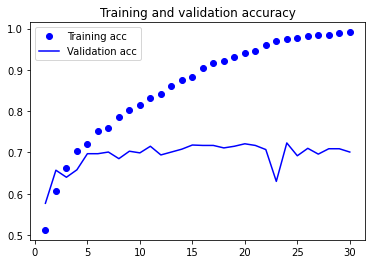

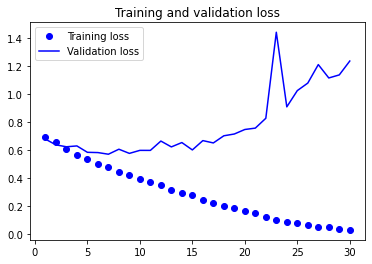

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 데이터 증식 사용하기

In [17]:
datagen = ImageDataGenerator(rotation_range = 20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

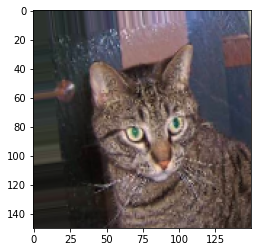

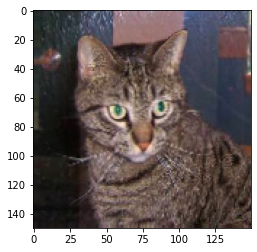

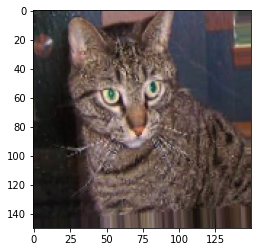

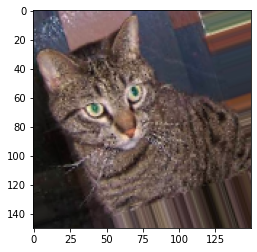

In [28]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[1]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

과적합을 더 억제하기 위해 완전 연결 분류기 직전에 Dropout층을 추가

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

데이터 증식과 드롭아웃을 사용하여 이 네트워크를 훈련시킵니다.

In [43]:
import numpy as np

np.random.seed(5)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#데이터셋 불러오기
train_datagen = ImageDataGenerator( rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                  fill_mode='nearest')

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

for j in range(1000):
    img_path = fnames[j]
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    for batch in train_datagen.flow(x, batch_size=1, save_to_dir=train_cats_dir, save_prefix='tri', save_format='jpg'):
        i += 1
        if i % 1 == 0:
            break
        
    

In [31]:
fnames = sorted([os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)])

for j in range(1000):
    img_path = fnames[j]
    img = image.load_img(img_path, target_size=(150,150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    for batch in train_datagen.flow(x, batch_size=1, save_to_dir=train_dogs_dir, save_prefix='tri', save_format='jpg'):
        i += 1
        if i % 1 == 0:
            break
        

In [48]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode='binary')

val_generator = test_datagen.flow_from_directory( val_dir,
                                                target_size=(150,150),
                                                batch_size=32,
                                                class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=val_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_2.h5')

Epoch 1/50
100/100 [==============================] - 54s 544ms/step - loss: 0.6934 - acc: 0.5365 - val_loss: 0.6891 - val_acc: 0.5120
Epoch 2/50
100/100 [==============================] - 55s 555ms/step - loss: 0.6797 - acc: 0.5775 - val_loss: 0.7445 - val_acc: 0.5050
Epoch 3/50
100/100 [==============================] - 56s 562ms/step - loss: 0.6706 - acc: 0.5925 - val_loss: 0.6499 - val_acc: 0.6420
Epoch 4/50
100/100 [==============================] - 59s 594ms/step - loss: 0.6450 - acc: 0.6405 - val_loss: 0.6513 - val_acc: 0.6040
Epoch 5/50
100/100 [==============================] - 60s 595ms/step - loss: 0.6288 - acc: 0.6570 - val_loss: 0.6094 - val_acc: 0.6540
Epoch 6/50
100/100 [==============================] - 60s 601ms/step - loss: 0.5969 - acc: 0.6900 - val_loss: 0.6436 - val_acc: 0.6330
Epoch 7/50
100/100 [==============================] - 58s 576ms/step - loss: 0.5729 - acc: 0.7050 - val_loss: 0.6752 - val_acc: 0.6330
Epoch 8/50
100/100 [==============================] - 5

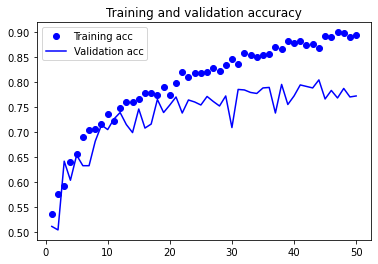

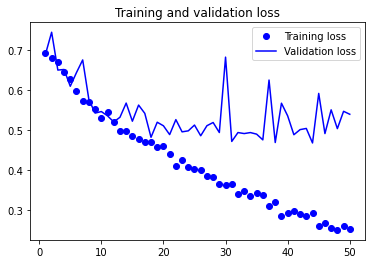

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 사전 훈련된 컨브넷 사용하기

사전 훈련된 네트워크는 일반적으로 대규모 이미지 분류 문제를 위해 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크

ImageNet - VGG16구조

특성 추출(feature extraction)과 미세 조정(fine tuning)

In [19]:
#특성 추출 - 사전에 학습된 네트워크의 표현을 사용하여 새로운 샘플에서 흥미로운 특성을 뽑아내는 것

In [20]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58892288/58889256 [==============================] - 3s 0us/step


In [21]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## 데이터 증식을 사용하지 않은 빠른 특성 추출

In [22]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [23]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(val_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
#완전 연결 분류기에 넣기 위해 (samples, 8192) 크기로 펼칩니다.

train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))


In [25]:
#완전 연결 분류기를 정의하고 저장된 데이터와 레이블을 사용하여 훈련합니다.

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [27]:
history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 18ms/step - loss: 0.6894 - acc: 0.6080 - val_loss: 0.4739 - val_acc: 0.8000
Epoch 2/30
100/100 [==============================] - 2s 17ms/step - loss: 0.4924 - acc: 0.7590 - val_loss: 0.3746 - val_acc: 0.8590
Epoch 3/30
100/100 [==============================] - 2s 17ms/step - loss: 0.4222 - acc: 0.8000 - val_loss: 0.3504 - val_acc: 0.8550
Epoch 4/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3731 - acc: 0.8385 - val_loss: 0.3100 - val_acc: 0.8780
Epoch 5/30
100/100 [==============================] - 2s 18ms/step - loss: 0.3298 - acc: 0.8565 - val_loss: 0.2930 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 2s 19ms/step - loss: 0.3143 - acc: 0.8675 - val_loss: 0.2815 - val_acc: 0.8860
Epoch 7/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2807 - acc: 0.8880 - val_loss: 0.2728 - val_acc: 0.8860
Epoch 8/30
100/100 [==============================] - 2s 20ms/step - 

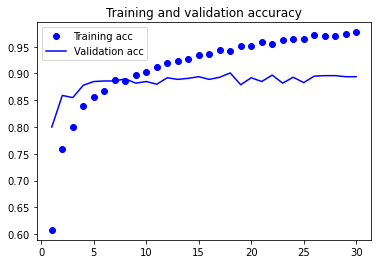

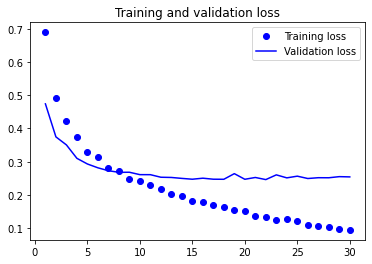

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# 작은 이미지 데이터셋에서는 과적합을 막기 위해 필수적인 데이터 증식을 사용하지 않아서, 많은 비율로 드롭아웃을 사용했음에도 train을 시작하면서 거의 바로 과대적합되는 것을 볼 수 있다.

## 데이터 증식을 사용한 특성 추출

In [30]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [32]:
print('conv_base를 동결하기 정 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 정 훈련되는 가중치의 수: 30


In [33]:
conv_base.trainable = False

In [34]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


이렇게 설정하면 추가한 2개의 Dense가중치만 훈련

층마다 2개씩(가중치 행렬과 편향 벡터) 총 4개의 텐서가 훈련

In [35]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                  fill_mode='nearest'
                                  )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = train_datagen.flow_from_directory( val_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50,
    verbose=2
)

model.save('cats_and_dogs_small_3.h5')

Epoch 1/30
100/100 - 317s - loss: 0.6120 - acc: 0.6805 - val_loss: 0.4680 - val_acc: 0.8170
Epoch 2/30
100/100 - 320s - loss: 0.5134 - acc: 0.7585 - val_loss: 0.3941 - val_acc: 0.8380
Epoch 3/30
100/100 - 332s - loss: 0.4813 - acc: 0.7780 - val_loss: 0.3608 - val_acc: 0.8520
Epoch 4/30
100/100 - 321s - loss: 0.4511 - acc: 0.7880 - val_loss: 0.3265 - val_acc: 0.8720
Epoch 5/30
100/100 - 325s - loss: 0.4216 - acc: 0.8055 - val_loss: 0.3076 - val_acc: 0.8740
Epoch 6/30
100/100 - 322s - loss: 0.4128 - acc: 0.8125 - val_loss: 0.3001 - val_acc: 0.8810
Epoch 7/30
100/100 - 324s - loss: 0.3958 - acc: 0.8265 - val_loss: 0.2931 - val_acc: 0.8840
Epoch 8/30
100/100 - 333s - loss: 0.3790 - acc: 0.8220 - val_loss: 0.2862 - val_acc: 0.8780
Epoch 9/30
100/100 - 324s - loss: 0.3903 - acc: 0.8365 - val_loss: 0.2817 - val_acc: 0.8870
Epoch 10/30
100/100 - 322s - loss: 0.3695 - acc: 0.8390 - val_loss: 0.2798 - val_acc: 0.8820
Epoch 11/30
100/100 - 320s - loss: 0.3668 - acc: 0.8325 - val_loss: 0.2773 - va

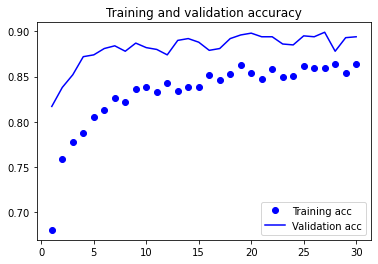

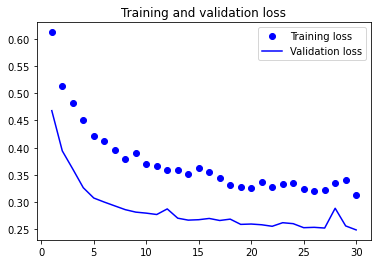

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 미세조정(fine tuning)

feature extraction에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고 모델에 새로 추가한 층(여기서는 완전 연결 분류기)과 함께 훈련하는 것

 ![fine tuning](cnn2.png)

네트워크 fine tuning 단계

1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가합니다.

2. 기반 네트워크를 동결합니다.

3. 새로 추가한 네트워크를 훈련합니다.

4. 기반 네트워크에서 일부 층의 동결을 해제합니다.

5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련합니다.

In [38]:
# 세 단계는 특성 추출 할 때 이미 완료. 네 번째 단계부터 시작.

In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [40]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [42]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

In [43]:
history = model.fit_generator( train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data = validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 364s 4s/step - loss: 0.3326 - acc: 0.8540 - val_loss: 0.2948 - val_acc: 0.8730
Epoch 2/30
100/100 [==============================] - 374s 4s/step - loss: 0.3051 - acc: 0.8645 - val_loss: 0.2929 - val_acc: 0.8730
Epoch 3/30
100/100 [==============================] - 378s 4s/step - loss: 0.2977 - acc: 0.8710 - val_loss: 0.2845 - val_acc: 0.8800
Epoch 4/30
100/100 [==============================] - 373s 4s/step - loss: 0.2552 - acc: 0.8950 - val_loss: 0.2837 - val_acc: 0.8770
Epoch 5/30
100/100 [==============================] - 374s 4s/step - loss: 0.2312 - acc: 0.9010 - val_loss: 0.2936 - val_acc: 0.8790
Epoch 6/30
100/100 [==============================] - 368s 4s/step - loss: 0.2435 - acc: 0.8960 - val_loss: 0.2567 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 368s 4s/step - loss: 0.2215 - acc: 0.9060 - val_loss: 0.2557 - val_acc: 0.8950
Epoch 8/30
100/100 [==============================] - 365s 4s/step - 

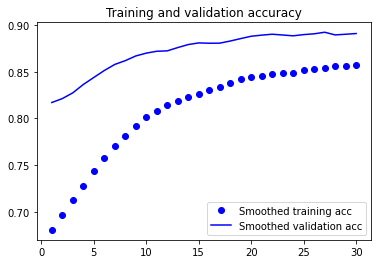

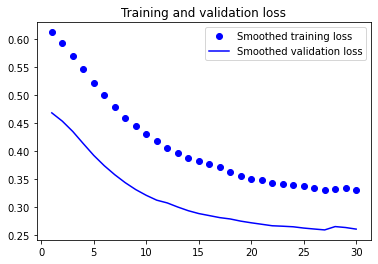

In [44]:
# 지수 이동 평균으로 정확도와 손실 값을 부드럽게 표현하기

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')

plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')

plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')

plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
test_generator = test_datagen.flow_from_directory( test_dir,
                                                 target_size = (150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.9259999990463257
